In [13]:
import networkx as nx
import numpy as np
import grakel as gk # graph kernels module
import matplotlib.pyplot as plt
import scipy
import string
import pickle # save data frame (results) in a .pkl file
import pandas as pd
import math
from tqdm import tqdm # Estimation of loop time
from datetime import datetime
import os, sys


In [27]:
df = pd.read_pickle("../data/binomial/wl_oa_10samples_p05.pkl")
df.head(10)

,B,H0_true,N,alpha,kernel,m,n,nr_nodes_1,nr_nodes_2,p_edge_1,p_edge_2,power_distfree_b,power_distfree_u,power_permutation_b,power_permutation_u,ratio,run_time,timestap
0,500.0,1.0,500.0,0.025,"[{'name': 'WL-OA', 'n_iter': 3}]",10.0,10.0,50.0,50.0,0.05,0.05,0.0,0.0,0.036,0.036,1.0,0:00:18.287390,2021-04-02 17:43:14.008016
1,500.0,1.0,500.0,0.050,"[{'name': 'WL-OA', 'n_iter': 3}]",10.0,10.0,50.0,50.0,0.05,0.05,0.0,0.0,0.068,0.068,1.0,0:00:18.292390,2021-04-02 17:43:14.008016
2,500.0,1.0,500.0,0.075,"[{'name': 'WL-OA', 'n_iter': 3}]",10.0,10.0,50.0,50.0,0.05,0.05,0.0,0.0,0.098,0.098,1.0,0:00:18.296379,2021-04-02 17:43:14.008016
3,500.0,1.0,500.0,0.100,"[{'name': 'WL-OA', 'n_iter': 3}]",10.0,10.0,50.0,50.0,0.05,0.05,0.0,0.0,0.118,0.118,1.0,0:00:18.300368,2021-04-02 17:43:14.008016
4,500.0,1.0,500.0,0.125,"[{'name': 'WL-OA', 'n_iter': 3}]",10.0,10.0,50.0,50.0,0.05,0.05,0.0,0.0,0.148,0.148,1.0,0:00:18.304379,2021-04-02 17:43:14.008016
5,500.0,1.0,500.0,0.150,"[{'name': 'WL-OA', 'n_iter': 3}]",10.0,10.0,50.0,50.0,0.05,0.05,0.0,0.0,0.164,0.164,1.0,0:00:18.308368,2021-04-02 17:43:14.008016
6,500.0,1.0,500.0,0.175,"[{'name': 'WL-OA', 'n_iter': 3}]",10.0,10.0,50.0,50.0,0.05,0.05,0.0,0.0,0.192,0.192,1.0,0:00:18.312370,2021-04-02 17:43:14.008016
7,500.0,1.0,500.0,0.200,"[{'name': 'WL-OA', 'n_iter': 3}]",10.0,10.0,50.0,50.0,0.05,0.05,0.0,0.0,0.230,0.230,1.0,0:00:18.317357,2021-04-02 17:43:14.008016
8,500.0,1.0,500.0,0.225,"[{'name': 'WL-OA', 'n_iter': 3}]",10.0,10.0,50.0,50.0,0.05,0.05,0.0,0.0,0.260,0.260,1.0,0:00:18.321363,2021-04-02 17:43:14.008016
9,500.0,1.0,500.0,0.250,"[{'name': 'WL-OA', 'n_iter': 3}]",10.0,10.0,50.0,50.0,0.05,0.05,0.0,0.0,0.292,0.292,1.0,0:00:18.325348,2021-04-02 17:43:14.008016


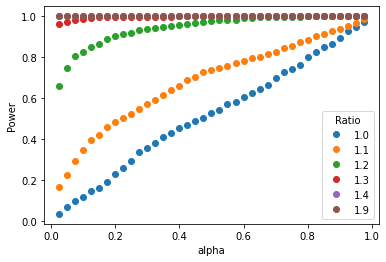

In [29]:

fig, ax = plt.subplots()

for i in np.unique(df['ratio']):
    ax.plot(df['alpha'].loc[(df['ratio'] == i)], df['power_permutation_b'].loc[(df['ratio'] == i)], 'o', label=str(i))

# lines, = ax.plot(df_Binomial_WLOA['nr_nodes_1'].loc[(df['p_edge_1'] == p)], 
#             df['rejections_u'].loc[(df['p_edge_1'] == p)], 'x', label='rejections_u')
# lines, = ax.plot(df['nr_nodes_1'].loc[(df['p_edge_1'] == p)], 
#             df['rejections_statistic_b'].loc[(df['p_edge_1'] == p)], '*', label='rejections_statistic_b')
# lines, = ax.plot(df['nr_nodes_1'].loc[(df['p_edge_1'] == p)], 
#             df['rejections_statistic_u'].loc[(df['p_edge_1'] == p)], '+', label='rejections_statistic_u')


ax.legend(title = 'Ratio')
ax.set_xlabel('alpha')
ax.set_ylabel('Power')
plt.show()